In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
import keras
import os

In [2]:
import os
folder_path="C:\\Users\\8902\\Desktop\\miniR\\training_set"
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    folder_path,
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 8005 files belonging to 1 classes.
Using 6404 files for training.
Using 1601 files for validation.


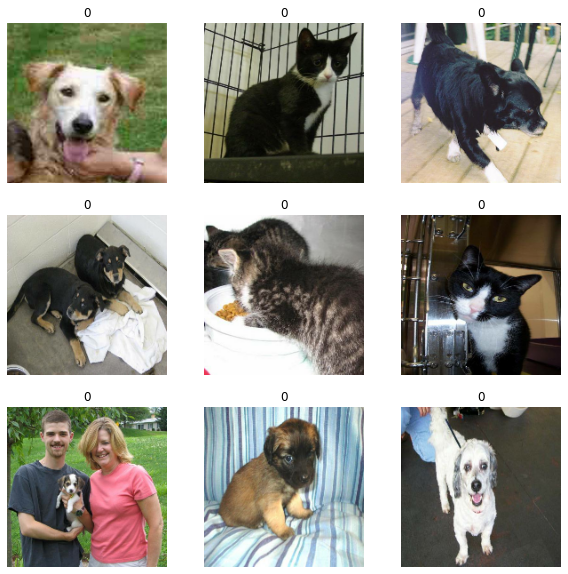

In [3]:
#visualize the data

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
        

In [4]:
#Data Augumentation
S=64
from keras.preprocessing.image import ImageDataGenerator
training_set="C:\\Users\\8902\\Desktop\\miniR\\training_set"
test_set="C:\\Users\\8902\\Desktop\\miniR\\test_set"

trainDatagen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

testDatagen = ImageDataGenerator(rescale=1./255)

trainDataset = trainDatagen.flow_from_directory(
        training_set,
        target_size=(S, S),
        batch_size=32,
        class_mode='binary')

testDataset = testDatagen.flow_from_directory(
        test_set,
        target_size=(S, S),
        batch_size=32,
        class_mode='binary')

Found 8005 images belonging to 1 classes.
Found 2023 images belonging to 1 classes.


In [5]:
#Cnn 
classifier = Sequential()
#1st layer of Convolutional layer
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(S,S,3), activation='relu', padding='same'))

#Max pooling -> Reduce the size heat map
#applying max pool to 1st cl to reduce heat map
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2) ))

#Normalization -> Increasing ur learning rate
classifier.add(BatchNormalization())
#Dropout -> TO eliminate overfitting

classifier.add(Dropout(0.2))

In [6]:
#2nd Convolution layer
classifier.add(Convolution2D(filters=16, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))

In [7]:
#3rd layer 

classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))

In [8]:
#Flattening the Layer 
classifier.add(Flatten())

In [9]:
#Adding fully connected layer
classifier.add(Dense(units=32,activation='relu'))

In [10]:
#output layer
classifier.add(Dense(units=1,activation='sigmoid'))
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 16)       0

In [ ]:
#Compiling with cnn
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#fitting


history = classifier.fit(trainDataset,
                    steps_per_epoch=int(8000/batch_size),
                    epochs=50,
                    validation_data=testDataset,
                    validation_steps=int(2000/batch_size))

Epoch 1/50
62/62 [==============================] - 48s 753ms/step - loss: 0.0467 - accuracy: 0.9914 - val_loss: 0.1265 - val_accuracy: 1.0000
Epoch 2/50
62/62 [==============================] - 39s 635ms/step - loss: 7.0112e-04 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 3/50
62/62 [==============================] - 33s 526ms/step - loss: 3.8053e-04 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 4/50
62/62 [==============================] - 27s 433ms/step - loss: 2.5698e-04 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 5/50
62/62 [==============================] - 22s 355ms/step - loss: 1.2639e-04 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 6/50
62/62 [==============================] - 19s 309ms/step - loss: 1.3982e-04 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 7/50
62/62 [==============================] - 19s 307ms/step - loss: 5.9495e-05 - accuracy: 1.0000 - val_loss: 0.001